# Comparing machine learning algorithms on predicting edible/poisonous mushrooms

## Let's start with our imports!

In [1]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

In [2]:
# Let's import the data and start exploring it
data = pd.read_csv('../input/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


It becomes clear that we are dealing with all categorical variables here.
We can use sci-kit learn's Label Encoder to deal with these categorical variables.

In [5]:
labelEncoder = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = labelEncoder.fit_transform(data[col])
    
# Train Test Split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Time to compare some Machine Learning models
We use a for loop to loop throuh the different models. The empty lists are made to create 
the overview table at the end.

In [6]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=30), 
          'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=1),
            'Linear SVM':SVC(kernel='rbf', gamma=.10, C=1.0)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

Results for: Logistic Regression

[[1217   57]
 [  73 1091]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1274
          1       0.95      0.94      0.94      1164

avg / total       0.95      0.95      0.95      2438

0.946677604594



Results for: Decision Tree

[[1274    0]
 [   0 1164]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438

1.0



Results for: Random Forest

[[1274    0]
 [   0 1164]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438

1.0



Results for: K-Nearest Neighbors

[[1273    1]
 [   1 1163]]
             precision    recall  f1-score   support

          0       1.00      1.00     

Logistic Regression clearly performs the poorest of our algorithms. The k-NN classifier comes extremely close to 100% accuracy. The tree-based methods and the linear SVM all achieve 100% accuracy. It looks like these machine learning algorithms have little trouble with this dataset. Let's explore the important features in predicting poisonous mushrooms next.

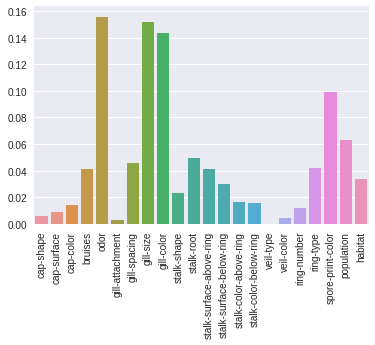

In [7]:
# Re-training the Random Forest
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

importances = rfc.feature_importances_
plot = sns.barplot(x=X.columns, y=importances)

for item in plot.get_xticklabels():
    item.set_rotation(90)

Odor has the highest feature importance in the Random Forest. We can explore the effect of odor on the predicted class a bit further with this next plot.

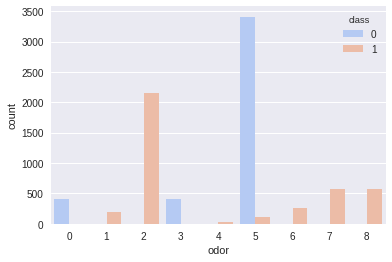

In [8]:
sns.countplot(x = 'odor', data = data, hue='class', palette='coolwarm')
plt.show()

From this plot we can see how important odor is in predicting the right classes. Most odor categories are only linked to one outcome class. And for odor #5 almost all mushrooms belong to class 0.
This was a very clear dataset where most ML algorithms will not have a problem with.